In [1]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

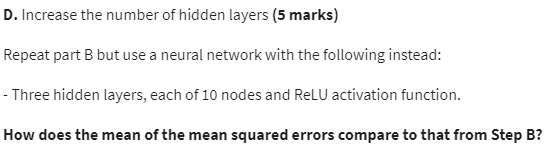

# Prepare data

In [2]:
# Read data
from sklearn.model_selection import train_test_split
data= pd.read_csv('concrete_data.csv')

# Split data
X = data.drop(['Strength'],axis =1)
y = data['Strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [3]:
# Processing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_B = scaler.transform(X_train)
X_test_B = scaler.transform(X_test)

# Build model

In [4]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(10, activation = 'relu', input_shape=(X.shape[1],)))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train & Validate model

In [5]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50

23/23 [==============================] - 1s 11ms/step - loss: 2718.3730 - val_loss: 854.9497
Epoch 2/50
23/23 [==============================] - 0s 3ms/step - loss: 537.1602 - val_loss: 372.4553
Epoch 3/50
23/23 [==============================] - 0s 3ms/step - loss: 333.5327 - val_loss: 291.2254
Epoch 4/50
23/23 [==============================] - 0s 3ms/step - loss: 256.1257 - val_loss: 237.0376
Epoch 5/50
23/23 [==============================] - 0s 3ms/step - loss: 214.4492 - val_loss: 202.7331
Epoch 6/50
23/23 [==============================] - 0s 3ms/step - loss: 186.6215 - val_loss: 177.8257
Epoch 7/50
23/23 [==============================] - 0s 3ms/step - loss: 170.3350 - val_loss: 163.1202
Epoch 8/50
23/23 [==============================] - 0s 3ms/step - loss: 159.3318 - val_loss: 162.6055
Epoch 9/50
23/23 [==============================] - 0s 4ms/step - loss: 150.8035 - val_loss: 156.7427
Epoch 10/50
23/23 [==============================] - 0s 3ms/step - loss: 140.44

# Report

In [6]:
# list of mse on test set
mse_history = model.history.history['val_loss']

In [7]:
# Calculate mean and standard deviation
print(f'Mean of MSEs: {np.mean(mse_history)}')
print(f'Standard Deviation of MSEs: {np.std(mse_history)}')

Mean of MSEs: 137.0125212097168
Standard Deviation of MSEs: 115.46582595867795


Both mean and standard deviation decrease significantly compare to B